    Import the requiered python libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

start the data cleaning process

In [52]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.3f}".format
df = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?', None])

In [53]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.000,4/4/2019 12:01,770.000,4/25/2019 14:35,662.000,1823652.000,208201448079117.000,33664962239.000,35521209507511.000,9.16456699548519E+015,42.000,5.000,23.000,44.000,NaN,NaN,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,NaN,NaN,37624.000,38787.000,1823652892.000,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.000,214.000,1545765.000,24420.000,1634479.000,1271433.000,3563542.000,137762.000,15854611.000,2501332.000,8198936.000,9656251.000,278082303.000,14344150.000,171744450.000,8814393.000,36749741.000,308879636.000
1,13114483482878900224.000,4/9/2019 13:04,235.000,4/25/2019 8:15,606.000,1365104.000,208201909211140.000,33681854413.000,35794009006359.000,L77566A,65.000,5.000,16.000,26.000,NaN,NaN,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,NaN,NaN,168.000,3560.000,1365104371.000,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.000,1022.000,1926113.000,7165.000,3493924.000,920172.000,629046.000,308339.000,20247395.000,19111729.000,18338413.000,17227132.000,608750074.000,1170709.000,526904238.000,15055145.000,53800391.000,653384965.000
2,13114483484080500736.000,4/9/2019 17:42,1.000,4/25/2019 11:58,652.000,1361762.000,208200314458056.000,33760627129.000,35281510359387.000,D42335A,NaN,NaN,6.000,9.000,NaN,NaN,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,1361762651.000,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.000,695.000,1684053.000,42224.000,8535055.000,1694064.000,2690151.000,672973.000,19725661.000,14699576.000,17587794.000,6163408.000,229584621.000,395630.000,410692588.000,4215763.000,27883638.000,279807335.000
3,13114483485442799616.000,4/10/2019 0:31,486.000,4/25/2019 7:36,171.000,1321509.000,208201402342131.000,33750343200.000,35356610164913.000,T21824A,NaN,NaN,44.000,44.000,NaN,NaN,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,NaN,NaN,3330.000,37882.000,1321509685.000,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.000,207.000,644121.000,13372.000,9023734.000,2788027.000,1439754.000,631229.000,21388122.000,15146643.000,13994646.000,1097942.000,799538153.000,10849722.000,749039933.000,12797283.000,43324218.000,846028530.000
4,13114483499480700928.000,4/12/2019 20:10,565.000,4/25/2019 10:40,954.000,1089009.000,208201401415120.000,33699795932.000,35407009745539.000,D88865A,NaN,NaN,6.000,9.000,NaN,NaN,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,1089009389.000,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.000,604.000,862600.000,50188.000,6248284.000,1500559.000,1936496.000,173853.000,15259380.000,18962873.000,17124581.000,415218.000,527707248.000,3529801.000,550709500.000,13910322.000,38542814.000,569138589.000


Retrieve the name of the column

In [54]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

The size of the data

In [55]:
df.size

8250055

To get the shape of data(rows x columns)

In [56]:
df.shape

(150001, 55)

datatypes of each columns

In [57]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [58]:
# to print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [59]:
#generate some descriptive statistics, by excluding Nan values
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,149010.000,150000.000,150000.000,150000.000,149431.000,148935.000,149429.000,122172.000,122189.000,150000.000,150000.000,61855.000,53352.000,149247.000,149247.000,149247.000,149247.000,149209.000,149209.000,149209.000,149209.000,68527.000,68191.000,150000.000,150000.000,150000.000,52463.000,57107.000,56415.000,19747.000,61684.000,38158.000,149246.000,149208.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150000.000,150000.000
mean,10138874654256523264.000,499.188,498.801,104608.560,208201639651672.219,41882819545.027,48474547977654.164,109.796,17.663,13300.046,1770.429,20809914.270,759658.665,92.845,3.069,1.717,1.610,98.530,0.777,0.148,0.079,114471023.702,3242301.385,1829176.872,1408879.968,104609105.546,989.700,340.434,810.837,149.257,965.465,141.305,3719.788,4022.083,1795321.774,32928.434,5750752.619,2056541.926,1791728.868,467373.442,11634072.504,11009410.135,11626851.719,11001754.820,422044702.595,8288398.111,421100544.194,8264799.424,41121206.292,454643430.079
std,2893172512268425216.000,288.612,288.098,81037.621,21488090841.366,2447443358621.660,22416372027957.652,619.783,84.794,23971.879,4625.356,182566527.915,26453047.172,13.038,6.215,4.160,4.829,4.634,3.225,1.625,1.295,963194563.977,19570643.167,5696395.466,4643230.599,81037611.577,2546.524,1445.365,1842.162,1219.112,1946.388,993.350,9171.609,10160.324,1035482.276,19006.178,3309097.017,1189916.926,1035839.510,269969.307,6710568.850,6345423.354,6725218.026,6359489.759,243967494.346,4782699.656,243205009.808,4769003.686,11276386.515,244142874.376
min,6917537518543529984.000,0.000,0.000,7142.000,204047108489451.000,33601001722.000,440015202000.000,0.000,0.000,0.000,0.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,40.000,40.000,0.000,0.000,7142988.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,12.000,0.000,207.000,3.000,14.000,2.000,53.000,105.000,42.000,35.000,2516.000,59.000,3290.000,148.000,2866892.000,7114041.000
25%,7349883246953990144.000,250.000,251.000,57440.500,208201401263249.000,33651295581.500,35460708865439.000,32.000,2.000,43.000,47.000,35651.500,4694.750,91.000,0.000,0.000,0.000,99.000,0.000,0.000,0.000,112403.500,24322.000,14877.750,21539.750,57440785.250,20.000,10.000,26.000,2.000,39.000,3.000,87.000,106.000,899148.000,16448.000,2882393.000,1024279.000,892793.000,233383.000,5833501.000,5517965.000,5777156.000,5475981.000,210473253.000,4128476.000,210186872.000,4145943.000,33222010.500,243106803.000
50%,7349883264156584960.000,499.000,500.000,86399.000,208201546329113.000,33663706799.000,35722009426311.000,45.000,5.000,63.000,63.000,568730.000,20949.500,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,1941949.000,229733.000,39304.500,46793.500,86399983.000,128.000,52.000,164.000,8.000,288.000,8.000,203.000,217.000,1794369.000,32920.000,5765829.000,2054573.000,179350

# Handling Missing values

In [60]:
def missing_values(dframe):
    # calculate total number of cells
    total_cells = np.product(dframe.shape)
    # count number of each values of each of columns
    missing_count = dframe.isnull().sum()
    # calculate total number of missing values
    total_missing = missing_count.sum()
    # Calculate percentage of missing values
    print("The telecom-industry dataset contains", round(((total_missing/total_cells) * 100), 2), "%", "missing values.")
    
missing_values(df)

The telecom-industry dataset contains 12.5 % missing values.


to know which column has missing value

In [61]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Calculate percentage of missing values per columns

In [62]:
round(((df.isna().sum()) * 100) / len(df), 4)
    

Bearer Id                                   0.661
Start                                       0.001
Start ms                                    0.001
End                                         0.001
End ms                                      0.001
Dur. (ms)                                   0.001
IMSI                                        0.380
MSISDN/Number                               0.711
IMEI                                        0.381
Last Location Name                          0.769
Avg RTT DL (ms)                            18.552
Avg RTT UL (ms)                            18.541
Avg Bearer TP DL (kbps)                     0.001
Avg Bearer TP UL (kbps)                     0.001
TCP DL Retrans. Vol (Bytes)                58.764
TCP UL Retrans. Vol (Bytes)                64.432
DL TP < 50 Kbps (%)                         0.503
50 Kbps < DL TP < 250 Kbps (%)              0.503
250 Kbps < DL TP < 1 Mbps (%)               0.503
DL TP > 1 Mbps (%)                          0.503


In [63]:
#drop columns with more than 50% missing valuesNb of sec with 31250B < Vol DL < 125000B
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
                   'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
                   'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [65]:
df_clean.shape

(150001, 45)

In [66]:
# check the skewness of each column
df_clean.skew(axis=0, skipna=True)

Bearer Id                          0.027
Start ms                           0.001
End ms                            -0.001
Dur. (ms)                          3.953
IMSI                              41.046
MSISDN/Number                    332.156
IMEI                               1.071
Avg RTT DL (ms)                   62.908
Avg RTT UL (ms)                   28.457
Avg Bearer TP DL (kbps)            2.589
Avg Bearer TP UL (kbps)            4.503
DL TP < 50 Kbps (%)               -2.298
50 Kbps < DL TP < 250 Kbps (%)     3.271
250 Kbps < DL TP < 1 Mbps (%)      4.566
DL TP > 1 Mbps (%)                 5.370
UL TP < 10 Kbps (%)               -8.985
10 Kbps < UL TP < 50 Kbps (%)     10.944
50 Kbps < UL TP < 300 Kbps (%)    21.878
UL TP > 300 Kbps (%)              36.174
Activity Duration DL (ms)          5.872
Activity Duration UL (ms)          7.383
Dur. (ms).1                        3.953
Nb of sec with Vol DL < 6250B      9.042
Nb of sec with Vol UL < 1250B      7.495
Social Media DL 

In [67]:
# fill catagorical/object dtype column with mode 
df_clean['Start'] = df_clean['Start'].fillna(df_clean['Start'].mode()[0])
df_clean['End'] = df_clean['End'].fillna(df_clean['End'].mode()[0])
df_clean['Last Location Name'] = df_clean['Last Location Name'].fillna(df_clean['Last Location Name'].mode()[0])
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])

In [68]:
# fill missing values using median(skewed and numeric dtypes)

df_clean['Start ms'] = df_clean['Start ms'].fillna(df_clean['Start ms'].median())
df_clean['End ms'] = df_clean['End ms'].fillna(df_clean['End ms'].median())
df_clean['Dur. (ms)'] = df_clean['Dur. (ms)'].fillna(df_clean['Dur. (ms)'].median())
df_clean['Dur. (ms).1'] = df_clean['Dur. (ms).1'].fillna(df_clean['Dur. (ms).1'].median())
df_clean['Avg Bearer TP DL (kbps)'] = df_clean['Avg Bearer TP DL (kbps)'].fillna(df_clean['Avg Bearer TP DL (kbps)'].median())
df_clean['Avg Bearer TP UL (kbps)'] = df_clean['Avg Bearer TP UL (kbps)'].fillna(df_clean['Avg Bearer TP UL (kbps)'].median())
df_clean['Activity Duration DL (ms)'] = df_clean['Activity Duration DL (ms)'].fillna(df_clean['Activity Duration DL (ms)'].median())
df_clean['Activity Duration UL (ms)'] = df_clean['Activity Duration UL (ms)'].fillna(df_clean['Activity Duration UL (ms)'].median())
df_clean['Total UL (Bytes)'] = df_clean['Total UL (Bytes)'].fillna(df_clean['Total UL (Bytes)'].median())
df_clean['Total DL (Bytes)'] = df_clean['Total DL (Bytes)'].fillna(df_clean['Total DL (Bytes)'].median())


In [27]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               1
50 Kbps < DL TP < 250 Kbps (%)    1
250 Kbps < DL TP < 1 Mbps (%)     1
DL TP > 1 Mbps (%)                1
UL TP < 10 Kbps (%)               1
10 Kbps < UL TP < 50 Kbps (%)     1
50 Kbps < UL TP < 300 Kbps (%)    1
UL TP > 300 Kbps (%)              1
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [69]:
# still there are some missing values, fill with median
def fill_with_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    return df[col]


df_clean['Avg RTT DL (ms)'] = fill_with_median(df_clean, 'Avg RTT DL (ms)')
df_clean['Avg RTT UL (ms)'] = fill_with_median(df_clean, 'Avg RTT UL (ms)')
#df_clean['Bearer Id'] = fix_miss_ffill(df_clean, 'Bearer Id')
df_clean['MSISDN/Number'] = fill_with_median(df_clean, 'MSISDN/Number')
#df_clean['IMSI'] = fill_with_median(df_clean, 'IMSI')
df_clean['IMEI'] = fill_with_median(df_clean, 'IMEI')

df_clean['DL TP < 50 Kbps (%)'] = fill_with_median(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fill_with_median(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fill_with_median(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['DL TP > 1 Mbps (%)'] = fill_with_median(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fill_with_median(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fill_with_median(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fill_with_median(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fill_with_median(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fill_with_median(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['Nb of sec with Vol UL < 1250B'] = fill_with_median(df_clean, 'Nb of sec with Vol UL < 1250B')

In [70]:
def drop_rows(columns):
        #Drop Rows of specified columns, which contain null values
        df_clean.dropna(subset=columns, inplace=True)
drop_rows(['Bearer Id', 'IMSI'])

In [71]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [72]:
df_clean.shape

(149001, 45)

# Tranforming Data

Scaling and Normalization

In [73]:
df_clean.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

In [74]:
df_clean['Start'] = pd.to_datetime(df_clean['Start'])
df_clean['End'] = pd.to_datetime(df_clean['End'])

In [75]:
df_clean[['Start', 'End']]

,Start,End
0,2019-04-04 12:01:00,2019-04-25 14:35:00
1,2019-04-09 13:04:00,2019-04-25 08:15:00
2,2019-04-09 17:42:00,2019-04-25 11:58:00
3,2019-04-10 00:31:00,2019-04-25 07:36:00
4,2019-04-12 20:10:00,2019-04-25 10:40:00
...,...,...
149995,2019-04-29 07:28:00,2019-04-30 00:01:00
149996,2019-04-29 07:28:00,2019-04-30 06:02:00
149997,2019-04-29 07:28:00,2019-04-30 10:41:00
149998,2019-04-29 07:28:00,2019-04-30 10:46:00


In [80]:
# drop duplicate rows
df_clean.drop_duplicates(inplace=True)

In [81]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.000,2019-04-04 12:01:00,770.000,2019-04-25 14:35:00,662.000,1823652.000,208201448079117.000,33664962239.000,35521209507511.000,9.16456699548519E+015,42.000,5.000,23.000,44.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,37624.000,38787.000,1823652892.000,Samsung,Samsung Galaxy A5 Sm-A520F,213.000,214.000,1545765.000,24420.000,1634479.000,1271433.000,3563542.000,137762.000,15854611.000,2501332.000,8198936.000,9656251.000,278082303.000,14344150.000,171744450.000,8814393.000,36749741.000,308879636.000
1,13114483482878900224.000,2019-04-09 13:04:00,235.000,2019-04-25 08:15:00,606.000,1365104.000,208201909211140.000,33681854413.000,35794009006359.000,L77566A,65.000,5.000,16.000,26.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,168.000,3560.000,1365104371.000,Samsung,Samsung Galaxy J5 (Sm-J530),971.000,1022.000,1926113.000,7165.000,3493924.000,920172.000,629046.000,308339.000,20247395.000,19111729.000,18338413.000,17227132.000,608750074.000,1170709.000,526904238.000,15055145.000,53800391.000,653384965.000
2,13114483484080500736.000,2019-04-09 17:42:00,1.000,2019-04-25 11:58:00,652.000,1361762.000,208200314458056.000,33760627129.000,35281510359387.000,D42335A,45.000,5.000,6.000,9.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,1361762651.000,Samsung,Samsung Galaxy A8 (2018),751.000,695.000,1684053.000,42224.000,8535055.000,1694064.000,2690151.000,672973.000,19725661.000,14699576.000,17587794.000,6163408.000,229584621.000,395630.000,410692588.000,4215763.000,27883638.000,279807335.000
3,13114483485442799616.000,2019-04-10 00:31:00,486.000,2019-04-25 07:36:00,171.000,1321509.000,208201402342131.000,33750343200.000,35356610164913.000,T21824A,45.000,5.000,44.000,44.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,3330.000,37882.000,1321509685.000,undefined,undefined,17.000,207.000,644121.000,13372.000,9023734.000,2788027.000,1439754.000,631229.000,21388122.000,15146643.000,13994646.000,1097942.000,799538153.000,10849722.000,749039933.000,12797283.000,43324218.000,846028530.000
4,13114483499480700928.000,2019-04-12 20:10:00,565.000,2019-04-25 10:40:00,954.000,1089009.000,208201401415120.000,33699795932.000,35407009745539.000,D88865A,45.000,5.000,6.000,9.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,1089009389.000,Samsung,Samsung Sm-G390F,607.000,604.000,862600.000,50188.000,6248284.000,1500559.000,1936496.000,173853.000,15259380.000,18962873.000,17124581.000,415218.000,527707248.000,3529801.000,550709500.000,13910322.000,38542814.000,569138589.000


In [83]:
#the cleaned data info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149001 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       149001 non-null  float64       
 1   Start                           149001 non-null  datetime64[ns]
 2   Start ms                        149001 non-null  float64       
 3   End                             149001 non-null  datetime64[ns]
 4   End ms                          149001 non-null  float64       
 5   Dur. (ms)                       149001 non-null  float64       
 6   IMSI                            149001 non-null  float64       
 7   MSISDN/Number                   149001 non-null  float64       
 8   IMEI                            149001 non-null  float64       
 9   Last Location Name              149001 non-null  object        
 10  Avg RTT DL (ms)                 149001 non-null  float64

Saving Cleaned Data

In [84]:
df_clean.to_csv("../data/cleaned_Telecom_data.csv")

In [33]:
# convert categorical data to numberic using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df_clean['Last Location Name'] = lb.fit_transform(df_clean['Last Location Name'])
df_clean['Handset Manufacturer'] = lb.fit_transform(df_clean['Handset Manufacturer'])
df_clean['Handset Type'] = lb.fit_transform(df_clean['Handset Type'])

In [34]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,9989,770.0,131,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,350,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,9990,235.0,475,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,26827,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,9994,1.0,125,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,9057,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,0,486.0,472,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,31167,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,15,565.0,122,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,15590,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [36]:
# perform min max scalling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [39]:
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1241,202.129965
492,23.754097
0,71.797383
1290,111.259539
309,111.150319


In [40]:
original_data[0].min(), original_data[0].max()

(0.04857801453964526, 1414.8562812564055)

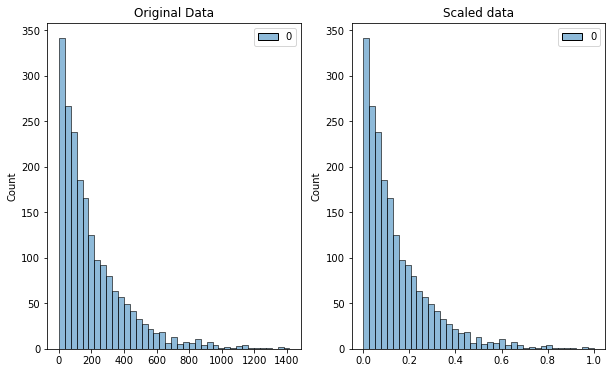

In [41]:
def min_max_scaler(df_clean):
    scaled_data = minmax_scaler.fit_transform(df_clean)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
min_max_scaler(original_data)

In [46]:
# retrieve the scaled data
df_scaler = pd.DataFrame(minmax_scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaler.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0.988506,0.999300,0.770771,0.020462,0.662663,0.980734,0.414307,7.248772e-08,0.355933,0.007685,...,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846
1,0.988506,0.999400,0.235235,0.074196,0.606607,0.733164,0.414353,9.163195e-08,0.358701,0.589009,...,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401
2,0.988506,0.999800,0.001001,0.019525,0.652653,0.731360,0.414194,1.809066e-07,0.353501,0.198854,...,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394
3,0.988506,0.000000,0.486486,0.073727,0.171171,0.709627,0.414303,1.692516e-07,0.354263,0.684297,...,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439
4,0.988506,0.001501,0.565566,0.019057,0.954955,0.584100,0.414303,1.119654e-07,0.354774,0.342291,...,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361


In [47]:
# perform normalization
from sklearn import preprocessing
d = preprocessing.normalize(df_clean)
df_normal = pd.DataFrame(d, columns=df_clean.columns)

In [48]:
df_normal.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.0,7.616770e-16,5.871371e-17,9.988956e-18,5.047854e-17,1.390563e-13,0.000016,2.567006e-09,0.000003,2.668805e-17,...,1.208939e-12,1.907305e-13,6.251818e-13,7.363043e-13,2.120421e-11,1.093764e-12,1.309578e-11,6.721113e-13,2.802226e-12,2.355256e-11
1,1.0,7.617532e-16,1.791912e-17,3.621950e-17,4.620845e-17,1.040913e-13,0.000016,2.568294e-09,0.000003,2.045601e-15,...,1.543896e-12,1.457299e-12,1.398333e-12,1.313596e-12,4.641815e-11,8.926840e-14,4.017728e-11,1.147978e-12,4.102364e-12,4.982163e-11
2,1.0,7.620582e-16,7.625157e-20,9.531447e-18,4.971603e-17,1.038365e-13,0.000016,2.574301e-09,0.000003,6.906105e-16,...,1.504113e-12,1.120866e-12,1.341097e-12,4.699696e-13,1.750619e-11,3.016741e-14,3.131596e-11,3.214586e-13,2.126171e-12,2.133575e-11
3,1.0,0.000000e+00,3.705826e-17,3.599074e-17,1.303902e-17,1.007671e-13,0.000016,2.573517e-09,0.000003,2.376533e-15,...,1.630878e-12,1.154955e-12,1.067114e-12,8.371980e-14,6.096604e-11,8.273084e-13,5.711547e-11,9.758130e-13,3.303540e-12,6.451101e-11
4,1.0,1.143774e-18,4.308214e-17,9.302692e-18,7.274400e-17,8.303865e-14,0.000016,2.569662e-09,0.000003,1.188762e-15,...,1.163552e-12,1.445949e-12,1.305776e-12,3.166103e-14,4.023851e-11,2.691529e-13,4.199247e-11,1.060684e-12,2.938950e-12,4.339771e-11


In [49]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,9989,770.0,131,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,350,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,9990,235.0,475,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,26827,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,9994,1.0,125,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,9057,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,0,486.0,472,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,31167,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,15,565.0,122,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,15590,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
